Perform the necessary imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.preprocessing import text, sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Activation, Dropout, Dense
from sklearn.model_selection import train_test_split

/home/aja7kor/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


****************************************************************************************************

So, here's what we'll do.

1.Understand the data using visualization

2.Use pandas to do data manipulation such as fill NaNs', drop redundant training examples, generate labels etc.,

3.Convert the text into a sequence(list of lists(sequence)), using tokenizer. Pad the sequence to form a 2D numpy array.

4.Build the Neural Network Model using Keras.

5.Train the model using an optimizer such as 'adam' or 'adagrad' and loss function 'binary_crossentropy'. 

6.Start predicting!

****************************************************************************************************

1.Data visualization and 
2.Use pandas to do data manipulation such as fill NaNs', drop redundant training examples, generate labels etc.,

In [2]:
train_df = pd.read_csv('data/text_emotion_train_val_set.csv')
train_df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [3]:
train_df.tail()

,tweet_id,sentiment,author,content
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...
39999,1753919049,love,Alpharalpha,@mopedronin bullet train from tokyo the gf ...


In [4]:
print(len(train_df))
print(type(train_df))
print(train_df.ndim)
print(train_df.shape)
print(train_df.dtypes)
print(train_df.size)

40000
<class 'pandas.core.frame.DataFrame'>
2
(40000, 4)
tweet_id      int64
sentiment    object
author       object
content      object
dtype: object
160000


Dropping unnecessary layers that do not contribute to emotion classification

In [5]:
train_df = train_df.drop(['tweet_id', 'author'], axis=1)

In [6]:
train_df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [7]:
train_df.shape

(40000, 2)

Check the frequency/no. of times different emotions are labelled

In [8]:
train_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

It is not a skewed data set for the 'sentiment' feature.
Becasue 'sentiment' is not  a feature. It is the label(y)
Plotting the above output as a bar graph

In [9]:
train_df['sentiment'].value_counts().plot.bar()

Plotting the same output for percentage visualization.
It says that 21.5% of the data set are neutral features

In [10]:
train_df['sentiment'].value_counts() / len(train_df)

neutral       0.215950
worry         0.211475
happiness     0.130225
sadness       0.129125
love          0.096050
surprise      0.054675
fun           0.044400
relief        0.038150
hate          0.033075
empty         0.020675
enthusiasm    0.018975
boredom       0.004475
anger         0.002750
Name: sentiment, dtype: float64

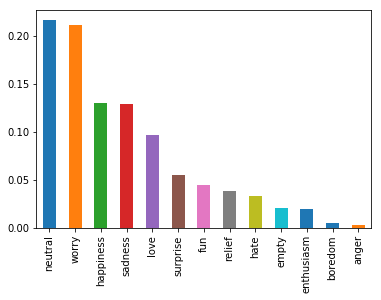

In [11]:
(train_df['sentiment'].value_counts() / len(train_df)).plot.bar()

Anger has a very low count. Since it is a critical emotion, we need more data for anger.
Read the data whose columns are seperated by a tab. 
Assign column names.

In [12]:
train_df_1_anger = pd.read_csv('data/anger-ratings-0to1.test.gold.txt', error_bad_lines=False, sep='\t', header=None)
train_df_1_anger.columns = ['tweet_id', 'content', 'sentiment', 'sentiment_intensity']
train_df_1_anger.head()

,tweet_id,content,sentiment,sentiment_intensity
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


In [13]:
train_df_1_anger.tail()

,tweet_id,content,sentiment,sentiment_intensity
755,11696,@ggreenwald What if the supposed animosity is ...,anger,0.646
756,11697,Will BYU's offense score 24+ vs WVU?,anger,0.125
757,11698,Id love 2 c Gyimah in action but his coach is ...,anger,0.542
758,11699,Forgiving means operating with God's spirit &a...,anger,0.250
759,11700,i've got a lot of tokens saved up and i wanna ...,anger,0.417


Drop unnecessary feature column which has no contribution to emotion classification.

In [14]:
train_df_1_anger = train_df_1_anger.drop(['tweet_id'], axis=1)
train_df_1_anger.head()

,content,sentiment,sentiment_intensity
0,At the point today where if someone says somet...,anger,0.319
1,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,This game has pissed me off more than any othe...,anger,0.898
3,@spamvicious I've just found out it's Candice ...,anger,0.271
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


We can only consider content which has sentiment_intensity > 0.5 as 'anger', because the rest can easily fall under other emotions. The value of 0.5 was arrived at by human analysis of data.

In [15]:
train_df_1_anger = train_df_1_anger[train_df_1_anger.sentiment_intensity > 0.5]

In [16]:
train_df_1_anger.head()

,content,sentiment,sentiment_intensity
2,This game has pissed me off more than any othe...,anger,0.898
4,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
7,@virginmedia I've been disconnected whilst on ...,anger,0.625
11,@eMilsOnWheels I'm furious 😩😩😩,anger,0.708


In [17]:
len(train_df_1_anger)

350

In [18]:
train_df_1_anger = train_df_1_anger.drop(['sentiment_intensity'], axis=1)

In [19]:
train_df_1_anger['sentiment'].value_counts()

anger    350
Name: sentiment, dtype: int64

In [20]:
train_df_1_anger.tail()

,content,sentiment
751,@kylemuir17 @Ealvarezfight @danawhite @TheNoto...,anger
752,@CallofDuty how do u guys determine teams? Cau...,anger
753,@CallofDuty how do u guys determine teams? Cau...,anger
755,@ggreenwald What if the supposed animosity is ...,anger
757,Id love 2 c Gyimah in action but his coach is ...,anger


Adding the additional data set on anger to the existing data set.

In [21]:
train_df = [train_df, train_df_1_anger]

In [22]:
train_df = pd.concat(train_df)

In [23]:
train_df.tail(360)

,content,sentiment
39990,@shonali I think the lesson of the day is not ...,neutral
39991,@lovelylisaj can you give me the link for the ...,neutral
39992,@jasimmo Ooo showing of your French skills!! l...,neutral
39993,"@sendsome2me haha, yeah. Twitter has many uses...",neutral
39994,Succesfully following Tayla!!,happiness
39995,@JohnLloydTaylor,neutral
39996,Happy Mothers Day All my love,love
39997,Happy Mother's Day to all the mommies out ther...,love
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,happiness
39999,@mopedronin bullet train from tokyo the gf ...,love


Now checking to see if anger emotion count has increased. Indeed! from 110 to 460

In [24]:
train_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
anger          460
boredom        179
Name: sentiment, dtype: int64

Count of 460 is still small for  a critical emotion. Adding more data.

In [25]:
train_df_2_anger = pd.read_csv('data/anger-ratings-0to1.train.txt', error_bad_lines=False, sep='\t', header=None)
train_df_2_anger.columns = ['tweet_id', 'content', 'sentiment', 'sentiment_intensity']
train_df_2_anger = train_df_2_anger[train_df_2_anger.sentiment_intensity > 0.5]
train_df_2_anger = train_df_2_anger.drop(['tweet_id', 'sentiment_intensity'], axis=1)
train_df_2_anger.tail()

,content,sentiment
381,don't provoke me after letting me down !,anger
382,could never be a angry drunk lol yall weirdos ...,anger
383,"Yet we still have deaths, road rage, &amp; vio...",anger
396,I have a rage rage ep 2 coming out soon I'll k...,anger
505,Egyptian officials expressed frustration and o...,anger


In [26]:
train_df = [train_df, train_df_2_anger]
train_df = pd.concat(train_df)

In [27]:
train_df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
anger          834
empty          827
enthusiasm     759
boredom        179
Name: sentiment, dtype: int64

There is very less 'fear' data, which is also a critical emotion in my point of view. Adding more.

In [28]:
train_df_1_fear = pd.read_csv('data/fear-ratings-0to1.test.gold.txt', error_bad_lines=False, sep='\t', header=None)
train_df_2_fear = pd.read_csv('data/fear-ratings-0to1.train.txt', error_bad_lines=False, sep='\t', header=None)
train_df_fear = [train_df_1_fear, train_df_2_fear]
train_df_fear = pd.concat(train_df_fear)
train_df_fear.columns = ['tweet_id', 'content', 'sentiment', 'sentiment_intensity']
train_df_fear = train_df_fear[train_df_fear.sentiment_intensity > 0.5]
train_df_fear = train_df_fear.drop(['tweet_id', 'sentiment_intensity'], axis=1)
train_df_fear.tail()
train_df_fear.shape

(1000, 2)

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
fear          1000
anger          834
empty          827
enthusiasm     759
boredom        179
Name: sentiment, dtype: int64


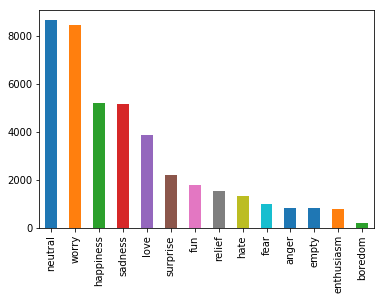

In [29]:
train_df = [train_df, train_df_fear]
train_df = pd.concat(train_df)
print(train_df['sentiment'].value_counts())
train_df['sentiment'].value_counts().plot.bar()

Checking to see if empty fileds(NaN) exist in the data.

In [30]:
np.where(pd.isnull(train_df))

(array([], dtype=int64), array([], dtype=int64))

Relieved that there isn't. :P

the '.sample' method randomly shuffles the data frame. 'frac=1' indicates that the entire fraction of data is to be considered after shuffling. 'reset_index' resets the row indexes after shuffling. drop=True makes sure that the old index values are not retained in the data frrame.

In [31]:
print(train_df.head())
train_df = train_df.sample(frac=1).reset_index(drop=True)
print(len(train_df))
train_df.head()

                                             content   sentiment
0  @tiffanylue i know  i was listenin to bad habi...       empty
1  Layin n bed with a headache  ughhhh...waitin o...     sadness
2                Funeral ceremony...gloomy friday...     sadness
3               wants to hang out with friends SOON!  enthusiasm
4  @dannycastillo We want to trade with someone w...     neutral
41724


,content,sentiment
0,"@tommcfly hey tom, i'm happy that you're enjoy...",sadness
1,@ItsMeGregory you're so far,neutral
2,Volunteering at Down Syndrome Indiana on Wedne...,neutral
3,Going to the courthouse to pay for tags &amp; ...,worry
4,"@gfalcone601 Hey gio, you are beautiful! I am ...",love


Generate labels from the data set column 'sentiment'

In [32]:
y_pandas_df = pd.get_dummies(train_df['sentiment'])
print(type(y_pandas_df))
print(y_pandas_df.shape)
print(y_pandas_df.ndim)
y_pandas_df.head()

<class 'pandas.core.frame.DataFrame'>
(41724, 14)
2


,anger,boredom,empty,enthusiasm,fear,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
y = y_pandas_df.values
print("properties of y")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(y), y.ndim, y.shape, y.size, y.dtype, y.itemsize))

properties of y
type : <class 'numpy.ndarray'>, dimensions : 2, shape : (41724, 14), total no. of elements : 584136, data type of each element: uint8, size of each element 1 bytes


In [34]:
train_df.shape

(41724, 2)

In [35]:
train_df = train_df.drop(['sentiment'], axis=1)

Flatten the array from 2D to 1D.

In [36]:
train_df.shape
x = train_df.values.flatten()

In [37]:
print(x)
print("properties of x")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(x), x.ndim, x.shape, x.size, x.dtype, x.itemsize))

["@tommcfly hey tom, i'm happy that you're enjoying brazil, but i'm sad cuz i'm not goin to see you in your show"
 "@ItsMeGregory you're so far"
 'Volunteering at Down Syndrome Indiana on Wednesday' ...
 '@UncleRUSH Hope you get better. I know you will have the best medical attention. if not let me know, I will be right over'
 '@arulnick I tried that but I can only use import/export for contacts saved locally on my Outlook. Thanks Though'
 "@_finn_ Except I dropped him on my break and now he's got a ding in his side.  At least it wasn't the screen."]
properties of x
type : <class 'numpy.ndarray'>, dimensions : 1, shape : (41724,), total no. of elements : 41724, data type of each element: object, size of each element 8 bytes


Necessary Global Variables.

In [38]:
list_of_classes = ['anger', 'boredom', 'empty', 'enthusiasm', 'fear', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']
max_features = 20000
max_text_length = 400
embedding_dims = 50
batch_size = 32
epochs = 3
num_filters_1 = 250
num_filters_2 = 250
filter_size = 3

3.Convert the text into a sequence(list of lists(sequence)), using tokenizer. Pad the sequence to form a 2D numpy array.

In [39]:
x_tokenizer = text.Tokenizer(num_words=max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

4.Build the Neural Network Model using Keras.

In [40]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=max_text_length))
model.add(Dropout(0.2))

model.add(Conv1D(filters=num_filters_1, kernel_size=filter_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_filters_2))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(14))
model.add(Activation('sigmoid'))


5.Train the model using an optimizer such as 'adam' or 'adagrad' and loss function 'binary_crossentropy'. 

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           1000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

In [42]:
model.fit(x_train_val, y, batch_size=batch_size, epochs=epochs)

Epoch 1/3
41724/41724 [==============================] - 247s - loss: 0.2295 - acc: 0.9281   
Epoch 2/3
41724/41724 [==============================] - 247s - loss: 0.2150 - acc: 0.9289   
Epoch 3/3
41724/41724 [==============================] - 245s - loss: 0.2049 - acc: 0.9294   


In [43]:
model.save('emo_class_keras_model.h5')

6.Start predicting!

In [44]:
from tensorflow.python.keras.models import load_model

def predict(test_set):
    global x_tokenizer
    model2 = load_model('emo_class_keras_model.h5')
    test_df = pd.read_csv(test_set)
    x_test = test_df['comment'].values
    x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
    x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)
    y_testing = model2.predict(x_testing, verbose = 1)
    sample_submission = pd.read_csv("data/submission.csv")
    sample_submission[list_of_classes] = y_testing
    sample_submission.to_csv("solution.csv", index=False)


In [45]:
print(predict('data/text_emotion_classification_test_set.csv'))

19/19 [==============================] - 0s
None
